In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_excel(r"C:\Users\MNGR\Desktop\Hackathon\Participants_Data\Data_Train.xlsx")

In [3]:
df_test = pd.read_excel(r"C:\Users\MNGR\Desktop\Hackathon\Participants_Data\Data_Test.xlsx")

In [4]:
df_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [5]:
df_train.shape

(6237, 9)

In [6]:
df_test.shape

(1560, 8)

In [7]:
df_train.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [9]:
df_train.nunique()

Title           5568
Author          3679
Edition         3370
Reviews           36
Ratings          342
Synopsis        5549
Genre            345
BookCategory      11
Price           1614
dtype: int64

In [10]:
df_train.isna().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [11]:
#Check the test set data

In [12]:
df_test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [13]:
df_test.describe()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,The Five Greatest Warriors (Jack West Series),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


In [14]:
df_test.isna().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
dtype: int64

In [15]:
#OUTLIER CHECk

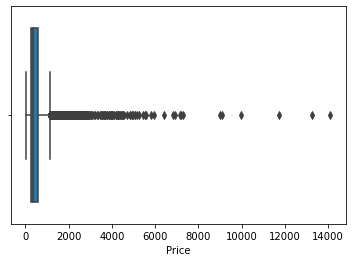

In [16]:
sns.boxplot(df_train['Price'])
plt.show()

In [17]:
for i in range(0, 100, 10):
    var =df_train["Price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 25.0
10 percentile value is 166.0
20 percentile value is 225.0
30 percentile value is 279.0
40 percentile value is 320.0
50 percentile value is 373.0
60 percentile value is 434.0
70 percentile value is 525.0
80 percentile value is 708.0
90 percentile value is 1094.0
100 percentile value is  14100.0


In [18]:
df_train['Price'].describe()

count     6237.000000
mean       560.707516
std        690.110657
min         25.000000
25%        249.180000
50%        373.000000
75%        599.000000
max      14100.000000
Name: Price, dtype: float64

In [19]:
for i in range(90, 100, 1):
    var =df_train["Price"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 1094.0
91 percentile value is 1168.0
92 percentile value is 1252.0
93 percentile value is 1347.0
94 percentile value is 1443.48
95 percentile value is 1575.0
96 percentile value is 1776.0
97 percentile value is 1999.59
98 percentile value is 2511.0
99 percentile value is 3439.0
100 percentile value is  14100.0


In [20]:
#from the above analysis only 1% value is beyond the range.

In [21]:
print(df_train['Price'].skew())
df_train['Price'].describe()

6.749865573718627


count     6237.000000
mean       560.707516
std        690.110657
min         25.000000
25%        249.180000
50%        373.000000
75%        599.000000
max      14100.000000
Name: Price, dtype: float64

In [22]:
#USE INTERQURTILE RANGE

In [23]:
Q1=np.percentile(df_train['Price'],25)
Q3=np.percentile(df_train['Price'],75)

In [24]:
IQR = Q3-Q1
upper=Q3+1.5*IQR
lower = Q1 -1.5*IQR

In [25]:
upper

1123.73

In [26]:
df_train['Price'] = np.where(df_train['Price'] > upper, upper, df_train['Price'])

In [27]:
df_train['Price'].describe()

count    6237.000000
mean      469.741201
std       303.518052
min        25.000000
25%       249.180000
50%       373.000000
75%       599.000000
max      1123.730000
Name: Price, dtype: float64

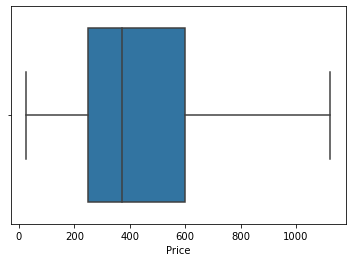

In [28]:
sns.boxplot(df_train['Price'])
plt.show()

In [29]:
#VISUALIZATION OF DATA

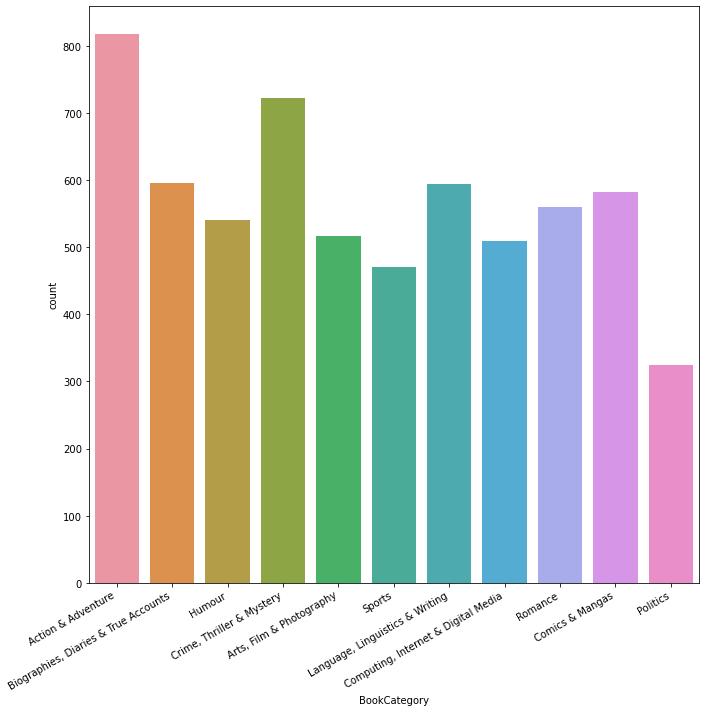

In [30]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x = 'BookCategory', data = df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha = "right")
plt.tight_layout()
plt.show()

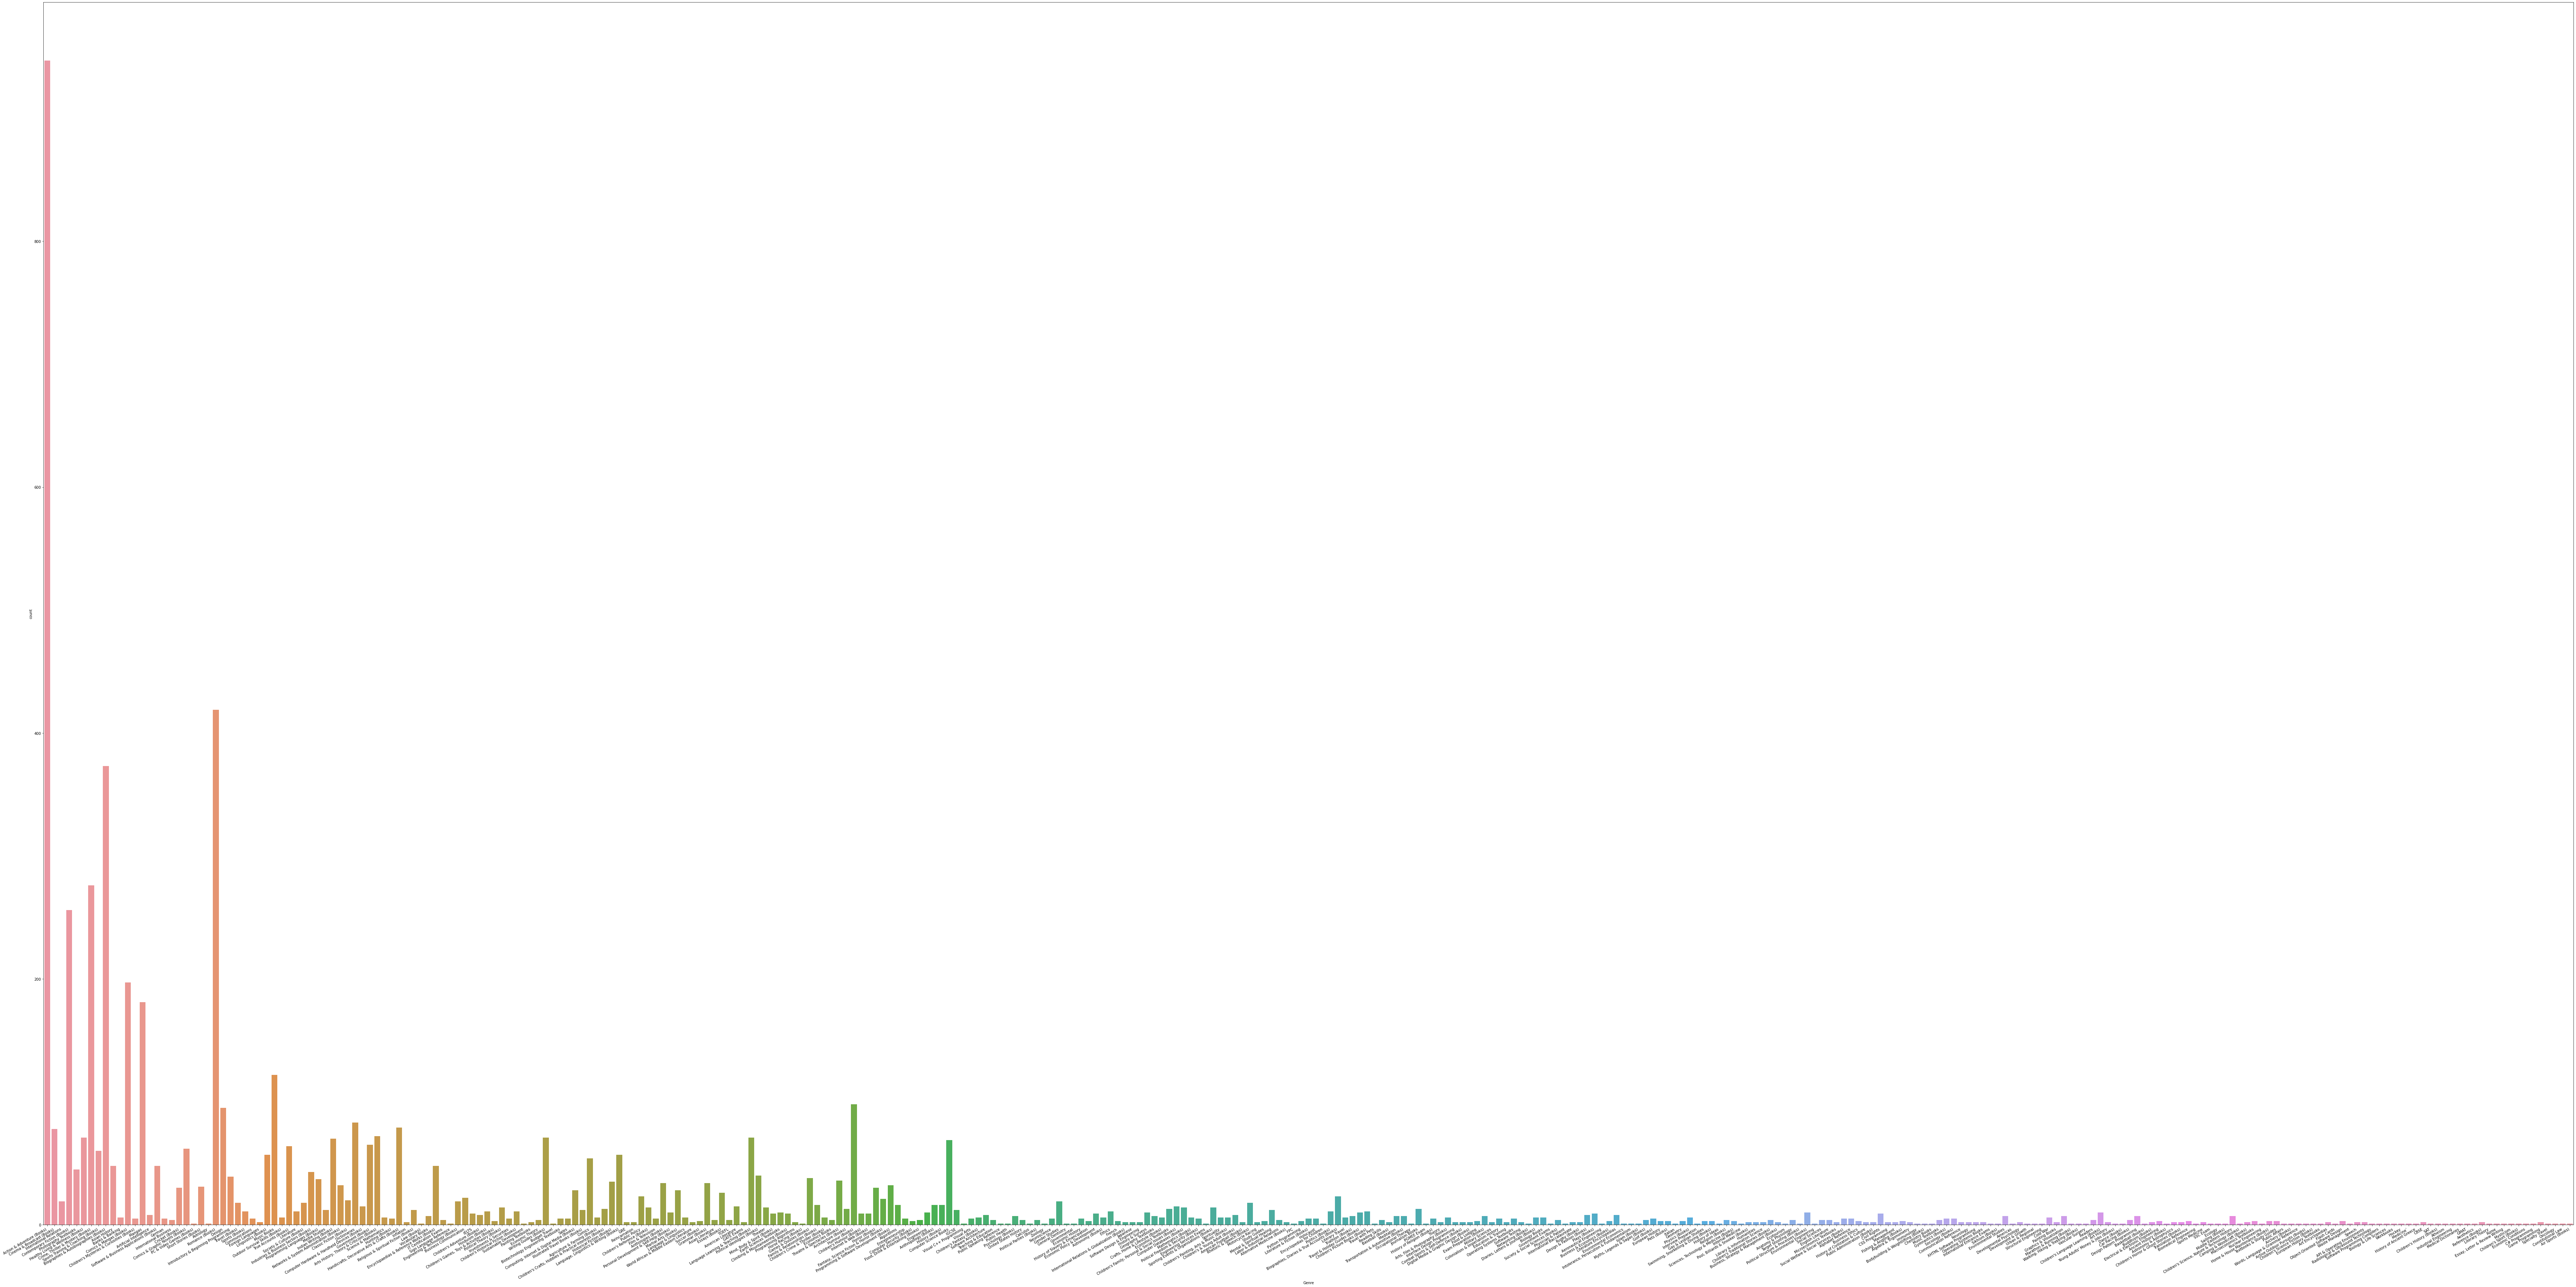

In [144]:
plt.figure(figsize=(100,50))
ax = sns.countplot(x = 'Genre', data = df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha = "right")
plt.tight_layout()
plt.show()

In [31]:
df_train['Genre'].value_counts()

Action & Adventure (Books)               947
Romance (Books)                          419
Biographies & Autobiographies (Books)    373
Crime, Thriller & Mystery (Books)        276
Contemporary Fiction (Books)             256
                                        ... 
Sign Language Reference                    1
Target Shooting (Books)                    1
Ecotourism                                 1
Internal Medicine                          1
Air Sports (Books)                         1
Name: Genre, Length: 345, dtype: int64

In [32]:
df_train['Genre'].nunique()

345

In [33]:
#ENCODING

In [34]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
le = LabelEncoder()
te = TargetEncoder()

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [36]:
df_train['Title'] = te.fit_transform(df_train['Title'], df_train['Price'])
df_train['Author'] = te.fit_transform(df_train['Author'], df_train['Price'])
df_train['Edition'] = le.fit_transform(df_train['Edition'].values)
df_train['Reviews'] = le.fit_transform(df_train['Reviews'].values)
df_train['Ratings'] = le.fit_transform(df_train['Ratings'].values)
df_train['Genre'] = te.fit_transform(df_train['Genre'], df_train['Price'])
df_train['BookCategory'] = te.fit_transform(df_train['BookCategory'], df_train['Price'])


In [37]:
df_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,469.741201,238.512213,1042,25,300,THE HUNTERS return in their third brilliant no...,373.247212,381.871760,220.00
1,469.741201,469.741201,2762,24,54,A layered portrait of a troubled genius for wh...,614.368718,342.427483,202.93
2,319.352850,319.352850,1960,33,265,"""During the time men live without a common Pow...",484.108421,557.469630,299.00
3,469.741201,241.170870,2615,26,45,A handful of grain is found in the pocket of a...,329.870703,321.762019,180.00
4,469.741201,469.741201,81,35,0,"For seven decades, ""Life"" has been thrilling t...",891.787556,646.308066,965.62


In [38]:
df_train.drop(['Synopsis'], axis=1, inplace=True)

In [39]:
df_train.head()

,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory,Price
0,469.741201,238.512213,1042,25,300,373.247212,381.871760,220.00
1,469.741201,469.741201,2762,24,54,614.368718,342.427483,202.93
2,319.352850,319.352850,1960,33,265,484.108421,557.469630,299.00
3,469.741201,241.170870,2615,26,45,329.870703,321.762019,180.00
4,469.741201,469.741201,81,35,0,891.787556,646.308066,965.62


<AxesSubplot:>

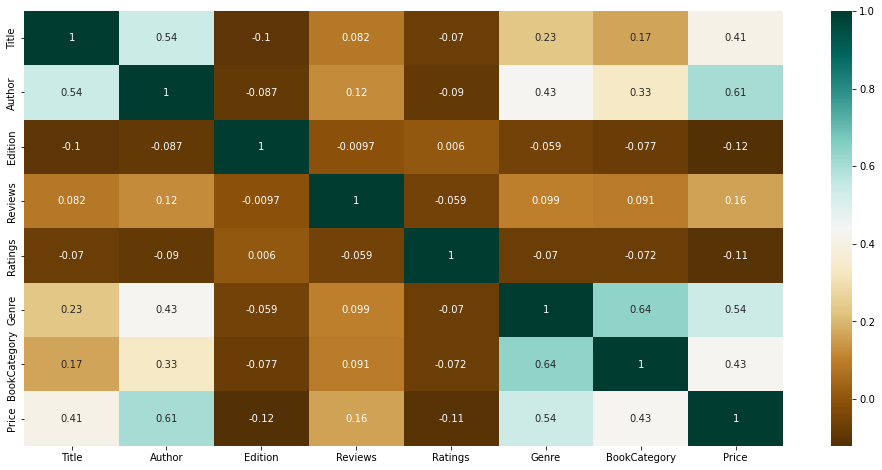

In [40]:
plt.figure(figsize=(17,8))
c= df_train.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [41]:
#TRAIN TEST SPLIT AND TESTING THE DATA

In [42]:
X = df_train.iloc[ : , :-1].values

In [43]:
Y = df_train.iloc[ : , 1].values

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
X = StandardScaler().fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.26, random_state=100)

In [80]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4615, 7), (1622, 7), (4615,), (1622,))

In [81]:
from sklearn.linear_model import LinearRegression 

In [82]:
regressor = LinearRegression()

In [83]:
regressor.fit(x_train, y_train)

LinearRegression()

In [84]:
print('The regression coefficients are:', regressor.coef_)

The regression coefficients are: [-3.06336264e-13  1.59537597e+02 -1.23762881e-13 -9.22553414e-14
  5.67637624e-14 -2.82078307e-14 -5.05642347e-14]


In [85]:
print('The intercept', regressor.intercept_)

The intercept 446.0720365809491


In [86]:
y_pred = regressor.predict(x_test)

# Comparing the predicted profit with actual profit
pd.DataFrame(data={'Predicted Price': y_pred, 'Actual Price': y_test})

,Predicted Price,Actual Price
0,241.170870,241.170870
1,212.232249,212.232249
2,469.741201,469.741201
3,670.178542,670.178542
4,469.741201,469.741201
...,...,...
1617,102.796531,102.796531
1618,469.741201,469.741201
1619,469.741201,469.741201
1620,406.753657,406.753657


In [87]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
print('Mean Squared Error is:', MSE)

Mean Squared Error is: 9.617399963215384e-26


In [88]:
import math
RMSE = math.sqrt(MSE)
print('Root Mean Squared Error is:', RMSE)

Root Mean Squared Error is: 3.101193312777419e-13


In [89]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R-Squared is:', r2)

R-Squared is: 1.0


In [90]:
adj = 1-(
         (1-r2)*(x_train.shape[0]-1)/
          (x_train.shape[0]-x_train.shape[1]-1)
          )
print('Adjusted R-Squared is:', adj)

Adjusted R-Squared is: 1.0


In [91]:
df_test.head()

,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory
0,1142,1071,227,23,160,189,5
1,665,356,1166,29,0,163,4
2,184,239,512,29,92,185,9
3,1394,45,638,20,8,174,4
4,862,933,745,23,154,143,7


In [92]:
df_test.drop(['Synopsis'], axis=1, inplace=True)

KeyError: "['Synopsis'] not found in axis"

In [ ]:
df_test['Title'] = le.fit_transform(df_test['Title'].values)
df_test['Author'] = le.fit_transform(df_test['Author'].values)
df_test['Edition'] = le.fit_transform(df_test['Edition'].values)
df_test['Reviews'] = le.fit_transform(df_test['Reviews'].values)
df_test['Ratings'] = le.fit_transform(df_test['Ratings'].values)
df_test['Genre'] = le.fit_transform(df_test['Genre'].values)
df_test['BookCategory'] = le.fit_transform(df_test['BookCategory'].values)

In [93]:
df_test.head()

,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory
0,1142,1071,227,23,160,189,5
1,665,356,1166,29,0,163,4
2,184,239,512,29,92,185,9
3,1394,45,638,20,8,174,4
4,862,933,745,23,154,143,7


In [94]:
m = df_test.corr()

<AxesSubplot:>

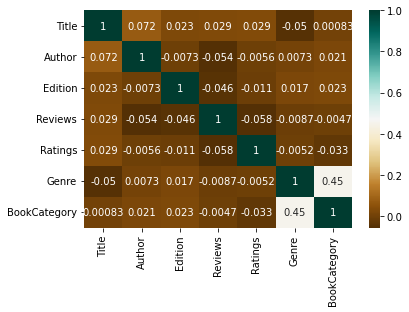

In [95]:
sns.heatmap(m, cmap="BrBG",annot=True)

In [97]:
X1 = df_test.iloc[:1560, :].values

In [98]:
X1.shape

(1560, 7)

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
X1 = StandardScaler().fit_transform(X1)

In [101]:
regressor = LinearRegression()

In [111]:
y_test[:1560]

array([241.17086957, 212.23224923, 469.7412009 , ..., 469.7412009 ,
       469.7412009 , 947.84532281])

In [112]:
regressor.fit(X1, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [1560, 1622]

In [110]:
print('The regression coefficients are:', regressor.coef_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [73]:
print('The intercept', regressor.intercept_)

The intercept 447.0205993213346


In [74]:
y1_pred = regressor.predict(X1)

# Comparing the predicted profit with actual profit
pd.DataFrame(data={'Predicted Price': y1_pred})

,Predicted Price
0,456.779426
1,435.426713
2,456.614658
3,446.368289
4,458.762321
...,...
1555,440.550608
1556,442.541416
1557,456.563792
1558,442.952446


In [75]:
y1_pred = pd.DataFrame(y1_pred, columns= ['submission'])

In [76]:
y1_pred.to_csv(f"submission_file.csv")

In [77]:
data = pd.read_csv(r"C:\Users\MNGR\Desktop\Hackathon\submission_file.csv")

In [78]:
data.shape

(1559, 2)